# Sarcasm Detection on YouTube Comments - Data Preprocessing

This notebook demonstrates the steps for preprocessing a dataset for sarcasm detection in YouTube comments using deep learning. The preprocessing steps include loading the dataset, cleaning the data, text normalization, and preparing the data for model training.

## Dataset Overview

We are using a dataset of YouTube comments which contains the following columns:
- `text`: The text of the YouTube comment.
- `labels`: The target label indicating whether the comment is sarcastic (1) or not (0).

Let's load the dataset and take a look at its structure.



In [40]:
import numpy as np
import pandas as pd


In [41]:
# Load the dataset
file_path = 'M:\\Internships\\infosys_springboard\\Notebooks\\sarcasm_training.csv'
df = pd.read_csv(file_path)



In [42]:
# Display the first few rows of the dataset
df.head()

,text,labels
0,<user> thanks for showing up for our appointme...,1
1,haha . # lol,1
2,i love waiting <num> min for a cab - such shor...,1
3,22 super funny quotes # funnyquotes # funnysa...,1
4,goog morning # sorrynotsorry # morning,1


### Data Cleaning:
- **Removing Mentions, Hashtags, URLs, HTML Tags, Punctuations, and Numbers**: 
  This step involves eliminating various non-essential elements from the text data, including mentions (e.g., "@username"), hashtags (e.g., "#hashtag"), URLs, HTML tags, punctuations, and numeric characters.

In [43]:
# Check for missing values
print(df.isnull().sum())


text      0
labels    0
dtype: int64


-> There is no null values in this dataset.

In [44]:
# Check for duplicates
print(f'Duplicate rows: {df.duplicated().sum()}')

Duplicate rows: 356


In [45]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [46]:
# Display the cleaned dataset
df.reset_index(drop=True, inplace=True)
df.head()

,text,labels
0,<user> thanks for showing up for our appointme...,1
1,haha . # lol,1
2,i love waiting <num> min for a cab - such shor...,1
3,22 super funny quotes # funnyquotes # funnysa...,1
4,goog morning # sorrynotsorry # morning,1


In [47]:
df.shape

(19461, 2)

## Removing Text Emojis Followed by Numbers

### Finding the Problem:
-> We discovered a discrepancy in the number of emojis within our dataset. While we expected around 3,782 emojis, the dataset indicated a count of 7,993.

-> The issue occurred because I struggled to accurately recognize and map the emojis in the dataset.

In [48]:
import pandas as pd
import re


# Function to remove emoji followed by numbers
def remove_emoji_followed_by_numbers(text):
    return re.sub(r'emoji[_\d]+', '', text)

# Apply the function to the DataFrame column
df['text'] = df['text'].apply(remove_emoji_followed_by_numbers)

# Output the modified DataFrame
print(df)


                                                    text  labels
0      <user> thanks for showing up for our appointme...       1
1                                          haha .  # lol       1
2      i love waiting <num> min for a cab - such shor...       1
3      22 super funny quotes # funnyquotes  # funnysa...       1
4                goog morning  # sorrynotsorry # morning       1
...                                                  ...     ...
19456                                 such a good read         0
19457  this is some people 's living conditions , alw...       0
19458  winner - seungyoon ( simple ) - rt if u save -...       0
19459  ok but concept : kravitz passing notes between...       0
19460                   life is good, you should get one       1

[19461 rows x 2 columns]


In [49]:
import pandas as pd

def remove_empty_rows(df, column_name):
    """
    Removes rows with empty strings in the specified column of the DataFrame.

    Parameters:
        df (DataFrame): The input DataFrame.
        column_name (str): The name of the column to check for empty strings.

    Returns:
        DataFrame: The DataFrame with empty rows removed.
    """
    return df[df[column_name].str.strip().astype(bool)].reset_index(drop=True)


    # Specifying the column containing the text data
    text_column_name = 'text'
    
    # Removing rows with empty strings in the specified column
    df_cleaned = remove_empty_rows(df, text_column_name)
    
    # Saving the modified dataset
    df_cleaned.to_csv('comments_without_empty_strings.csv', index=False)


In [50]:
# Saving the modified dataset
df.to_csv('comments_without_empty_strings.csv', index=False)#

### Tokenization and Lemmatization:
- **Tokenization and Lemmatization**:
  - **Tokenization**: Splitting text into individual words or tokens.
  - **Lemmatization**: Converting tokens to their base or root forms. For example, "running" becomes "run" after lemmatization.

In [51]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [52]:
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Download NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

In [54]:
# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [55]:
# Apply preprocessing to the comments
df['cleaned_comment'] = df['text'].apply(preprocess_text)

In [73]:
# Filter out rows where 'cleaned_comment' is empty
df = df[df['cleaned_comment'].str.strip() != '']


In [74]:
# Display the first few rows of the preprocessed dataset
df.head()

,labels,cleaned_comment
0,1,user thanks showing appointment today
1,1,haha lol
2,1,love waiting num min cab shortage user please ...
3,1,22 super funny quote funnyquotes funnysayings ...
4,1,goog morning sorrynotsorry morning


In [75]:
# #loading the dataset
#df.to_csv('M:/Internships/infosys_springboard/Notebooks/Preprocessing/preprocessed_dataset111.csv',index = False)

In [58]:

# Checking for empty strings in the 'cleaned_comment' column
empty_strings_mask = df['cleaned_comment'].str.strip().astype(bool)

# Now, you can use this mask to filter the DataFrame
non_empty_df = df[empty_strings_mask]

# To count the number of empty strings:
num_empty_strings = (~empty_strings_mask).sum()

print("Number of empty strings:", num_empty_strings)

Number of empty strings: 41


## Data Visualization

We can visualize the distribution of the labels to understand the class balance in our dataset. This is important as it impacts model training.



In [59]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\manis\AppData\Local\Temp\ipykernel_13388\914287683.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='labels', data=df, palette=color_palette)


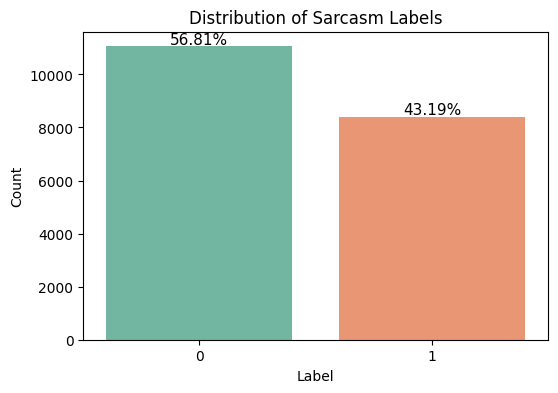

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'labels' is the column containing the labels in your DataFrame

# Calculate percentage of each label
label_counts = df['labels'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))

# Define a color palette for each label
color_palette = sns.color_palette("Set2", len(label_counts))

ax = sns.countplot(x='labels', data=df, palette=color_palette)

total = len(df)
# Annotate the bars with percentages
for p in ax.patches:
    percentage = '{:.2f}%'.format((p.get_height() * 100) / total)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Sarcasm Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [61]:
df.value_counts('labels')

labels
0    11056
1     8405
Name: count, dtype: int64

### Droping the text column

In [62]:
df.drop('text',axis = 1,inplace = True )

In [63]:
df.head()

,labels,cleaned_comment
0,1,user thanks showing appointment today
1,1,haha lol
2,1,love waiting num min cab shortage user please ...
3,1,22 super funny quote funnyquotes funnysayings ...
4,1,goog morning sorrynotsorry morning


In [64]:
df.tail()

,labels,cleaned_comment
19456,0,good read
19457,0,people living condition always remember blesse...
19458,0,winner seungyoon simple rt u save repost edit ...
19459,0,ok concept kravitz passing note magnus julia p...
19460,1,life good get one


## Final Preparation

The final step is to prepare the data for input into a deep learning model. This includes splitting the data into training and testing sets and vectorizing the text data.



### Train-Test Split:
- **Train-Test Split**:
  - Splitting the dataset into two subsets: a training set used to train the model and a testing set used to evaluate its performance. This ensures an unbiased assessment of the model's effectiveness.


In [65]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [66]:
# Split the data into training and testing sets
X = df['cleaned_comment']
y = df['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Tokenization for Deep Learning:
- **Tokenization for Deep Learning**:
  - Converting text data into sequences of integers, where each unique word is represented by a unique integer. This process prepares the text data for input into deep learning models.


In [67]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

### Padding Sequences:
- **Padding Sequences**:
  - Ensuring that all sequences have the same length by adding padding (usually zeros) to shorter sequences. This uniform length requirement is necessary for feeding data into deep learning models.


In [68]:
# Pad the sequences
max_len = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [69]:
# Display the shape of the padded data
print(f'Training data shape: {X_train_pad.shape}')
print(f'Testing data shape: {X_test_pad.shape}')

Training data shape: (15568, 29)
Testing data shape: (3893, 29)


### Saving Data:
- **Saving Data**:
  - Storing the preprocessed data and tokenizer for future use. This ensures that the processed data can be reused without the need for repeating preprocessing steps.


In [70]:
# Save the preprocessed data and tokenizer for future use
np.save('X_train_pad.npy', X_train_pad)
np.save('X_test_pad.npy', X_test_pad)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)


In [71]:
import pickle

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)



## Conclusion

This notebook has demonstrated the preprocessing steps for preparing a dataset of YouTube comments for sarcasm detection using deep learning. The steps include loading the dataset, cleaning the data, text preprocessing, and preparing the data for model training.

You can now proceed with training a deep learning model using the preprocessed data.



In [72]:
#loading the dataset
# df.to_csv('M:/Internships/infosys_springboard/Notebooks/Preprocessing/preprocessed_dataset111.csv',index = False)